### reading  the dataset


In [1]:
import pandas as pd 
df=pd.read_csv('hand_landmarks_data.csv')
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


## lets see data info
- to see if there is null values in the data
- to see the data type of each column 

In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22  y8      2

## check for duplicates


In [3]:
df.duplicated().sum()

np.int64(0)

### good we have no nulls , the data type of each column is numerical except the label column as it should be and there is no duplicates <br> <br> so lets go to the next step


## now lets visualize some of our dataset samples


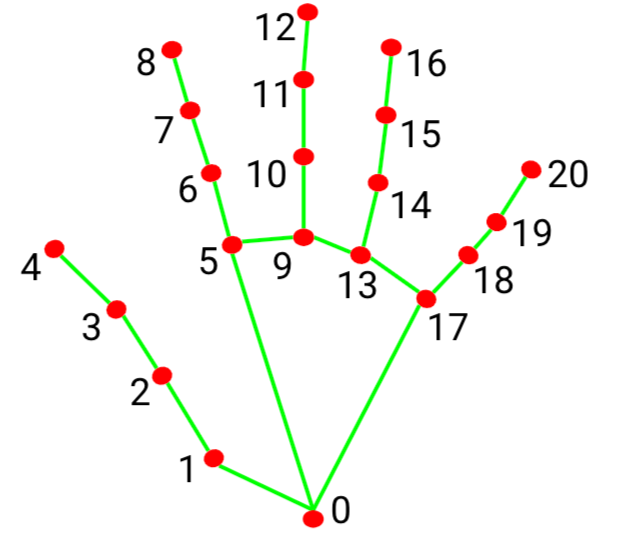

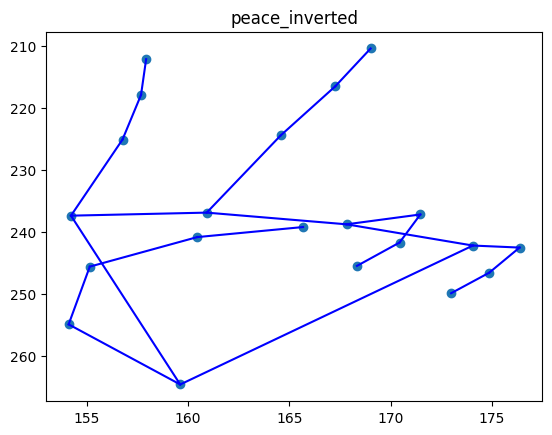

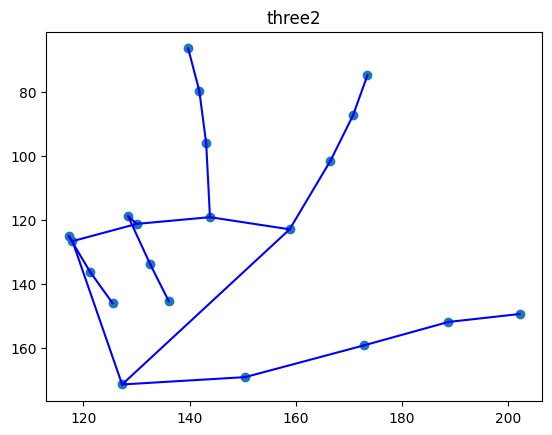

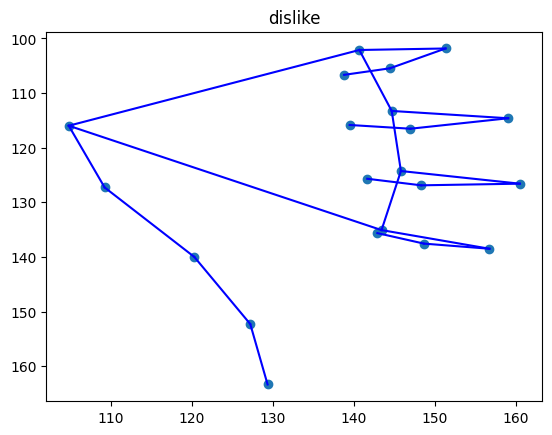

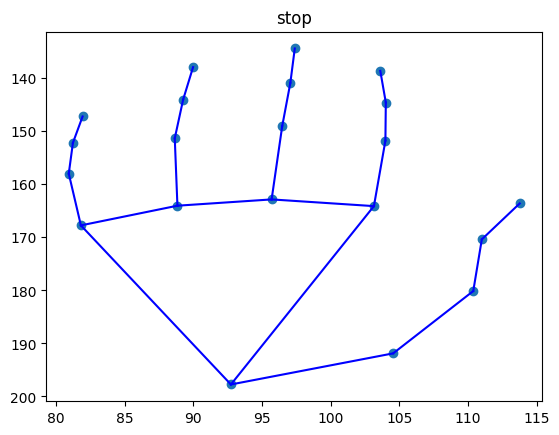

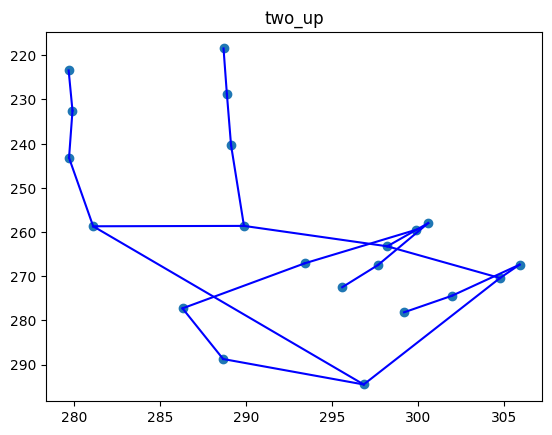

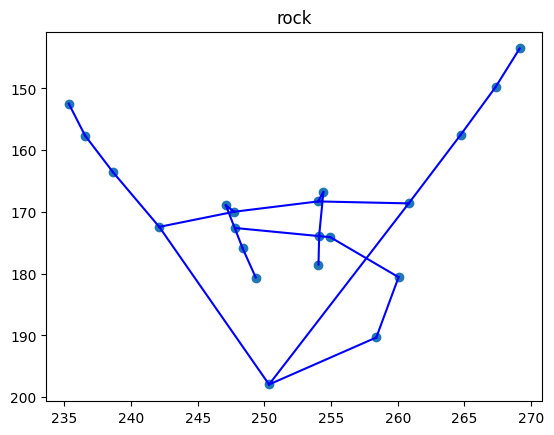

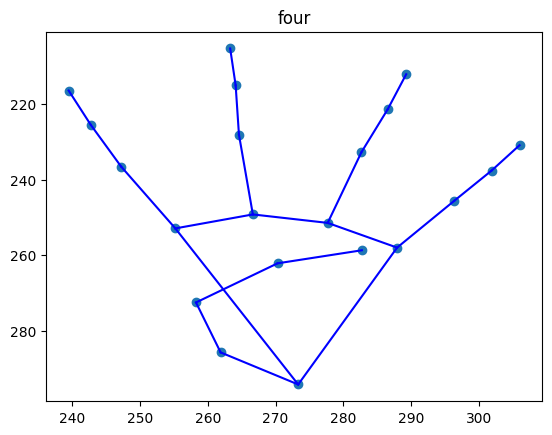

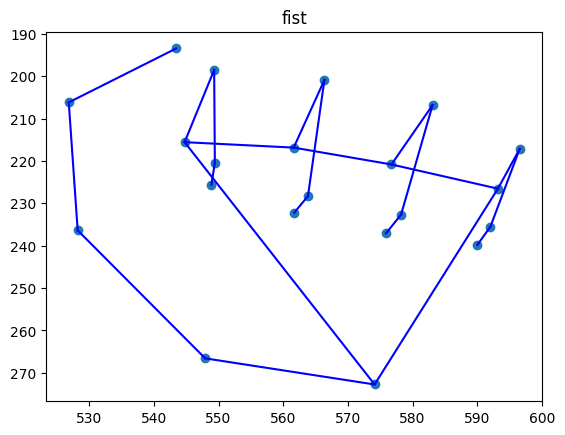

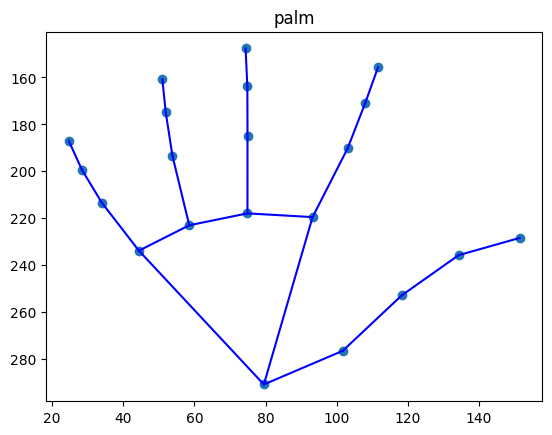

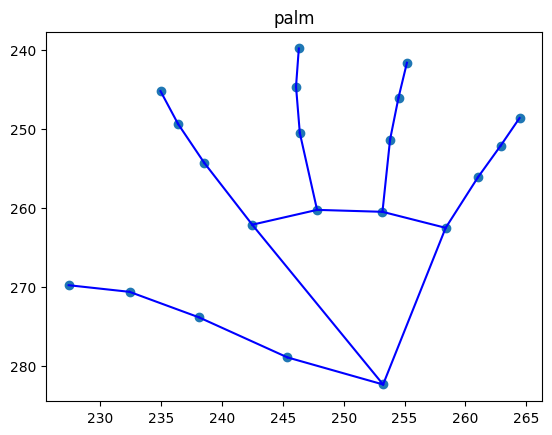

In [4]:
import matplotlib.pyplot as plt
import numpy as np
def visualize_hand_landmarks(sample):
    
    ## first we need to scatter hand landmarks points
    x=sample[0::3][0:-1]
    y=sample[1::3]
    plt.scatter(x,y)
    ## then we need to connect the points with lines to visualize the hand skeleton we can use the image coordinates of the landmarks to connect them in the correct order
    lines=[
        (0,1),(1,2),(2,3),(3,4),
        (0,5),(5,6),(5,9),(6,7),(7,8),
        (9,10),(9,13),(10,11),(11,12),
        (13,14),(13,17),(14,15),(15,16),
        (0,17),(17,18),(18,19),(19,20)]
    for line in lines:
        plt.plot([x.iloc[line[0]], x.iloc[line[1]]], [y.iloc[line[0]], y.iloc[line[1]]], color='blue')
    plt.title(sample.iloc[-1])
    ## invert y-axis as media pipe uses a coordinate system where the origin is at the top-left corner of the image, and the y-axis increases downwards.
    plt.gca().invert_yaxis()

    plt.show()
rndIndex=np.random.randint(0,len(df),10)
for i in rndIndex:
    visualize_hand_landmarks(df.iloc[i])    



### Now let's normalize our dataset so hand size or hand position from the camera doesn't affect our prediction
- we will do it by first making point 0 (wrist) as the origin of the hand (handles hand position)
- Then we will divide by the distance from point 0 to point 12 (middle fingertip) to normalize scale (handles hand size)

In [5]:
X = df.drop('label', axis=1).copy()
y = df['label']

x_cols = list(range(0, X.shape[1], 3))
y_cols = [c + 1 for c in x_cols]
z_cols = [c + 2 for c in x_cols]


X.iloc[:, x_cols] = X.iloc[:, x_cols].sub(X.iloc[:, 0], axis=0)
X.iloc[:, y_cols] = X.iloc[:, y_cols].sub(X.iloc[:, 1], axis=0)
X.iloc[:, z_cols] = X.iloc[:, z_cols].sub(X.iloc[:, 2], axis=0)

X.iloc[:, x_cols] = X.iloc[:, x_cols].div(np.sqrt((X['x12']**2)+(X['y12']**2+(X['z12']**2))), axis=0)
X.iloc[:, y_cols] = X.iloc[:, y_cols].div(np.sqrt((X['x12']**2)+(X['y12']**2+(X['z12']**2))), axis=0)
X.iloc[:, z_cols] = X.iloc[:, z_cols].div(np.sqrt((X['x12']**2)+(X['y12']**2+(X['z12']**2))), axis=0)

### now lets split our dataset to train and test before preprocessing our data to prevent data leakage <br>
#### but first lets see number of instances of each class

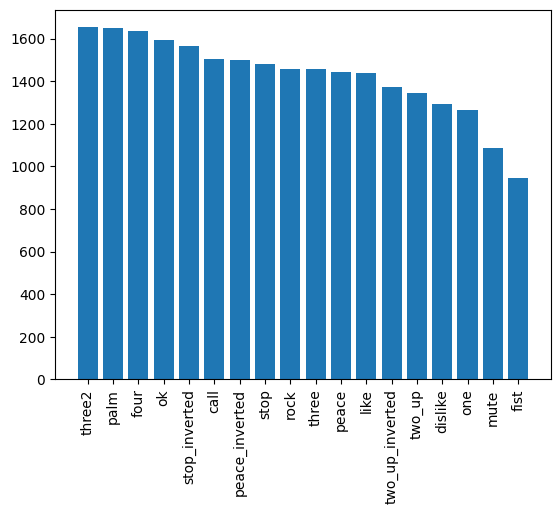

In [6]:
plt.bar(y.value_counts().index, y.value_counts().values)
plt.xticks(rotation=90)
plt.show()

### Now since our data labels don't contain the same number of samples, we will have to use stratify


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### now lets transform our training data(help some models to converge faster)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### encoding our labels using label encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)